# 演習問題1

  猫の顔を認識するAIを開発するために、集めた猫の画像を前処理することを想定します。

3枚の猫の画像それぞれに対し、以下のような処理を行ってください。

- 画像数を水増しするため、色を塗り替える、縦横比を変える、回転、左右反転などの手段で、1枚の画像から5枚の画像を作ってください。
- 猫だとわからなくなるような画像修正はしないでください。
- 最終的な画像は顔の部分だけのアップ(耳が欠けていたり, 背景が残っていても可)、256✕256画素のカラー画像とします。


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_ax(row, col, figsize=None):
    if figsize is None:
        figsize = (col * 5, row * 5)
    fig = plt.figure(figsize=figsize)
    ax = [fig.add_subplot(row, col, n) for n in range(1, row * col + 1)]
    return ax

def my_imshow(img, ax=None, title=None):
    if ax is None:
        ax = get_ax(1, 1)[0]
    if not title is None:
        ax.set_title(title)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [7]:
class CatImage():
    ''' 猫の画像を扱うためのクラス
    '''
    def __init__(self, filename=None):
        if filename:
            self.img = cv2.imread(filename)
       
    def change_color(self):
        '''色変更'''
        new_cat = CatImage()
        ### make image as same shape
        new_cat.img = self.img.copy()
        ### B <-> G
        new_cat.img[:,:,0] = self.img[:,:,1]
        new_cat.img[:,:,1] = self.img[:,:,0]
        # new_cat.img[:,:,2] = self.img[:,:,2]
        return new_cat

    def _resize(self, rx, ry):
        '''resize'''
        new_cat = CatImage()
        height = self.img.shape[0]
        width = self.img.shape[1]
        new_cat.img = cv2.resize(self.img, (int(width * rx), int(height * ry)))
        return new_cat

    def change_ratio(self):
        '''縦横比変更'''
        return self._resize(1.2, 1.0)

    def _rotate(self, deg):
        '''回転'''
        new_cat = CatImage()
        height = self.img.shape[0]
        width = self.img.shape[1]
        center = (int(width/2), int(height/2))
        matrix1 = cv2.getRotationMatrix2D(center, deg, 1.0)
        new_cat.img = cv2.warpAffine(self.img, matrix1, (width, height))
        return new_cat

    def rotate_right(self):
        '''右15度回転'''
        return self._rotate(15)
    
    def rotate_left(self):
        '''左15度回転'''
        return self._rotate(-15)

    def flip(self):
        '''左右反転'''
        new_cat = CatImage()
        new_cat.img = cv2.flip(self.img, 1)
        return new_cat

    def _trim(self, origin, x, y):
        '''トリミング
        origin:中心
        x, y: 幅、高さ
        '''
        new_cat = CatImage()

        start_x = origin[0] - int(x / 2)
        end_x = origin[0] + int(x / 2)
        start_y = origin[1] - int(y / 2)
        end_y = origin[1] + int(y / 2)
        new_cat.img = self.img[start_y:end_y, start_x:end_x, :]

        return new_cat
    
    def nomalize(self, origin, ratio):
        '''256x256画素の画像に変換
        中心点と、拡大率を与える
        '''
        width = 256
        height = 256

        # 拡大
        new_cat = self._resize(ratio, ratio)

        # # トリミング
        new_orig_x = int(origin[0] * ratio)
        new_orig_y = int(origin[1] * ratio)
        new_cat2 = new_cat._trim((new_orig_x, new_orig_y), width, height)
        return new_cat2

    def save(self, filename):
        cv2.imwrite(filename, self.img)
    
    def show(self, ax=None, title=None):
        my_imshow(self.img, ax, title)
        plt.show()

   

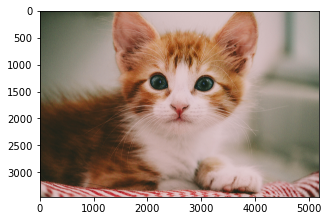

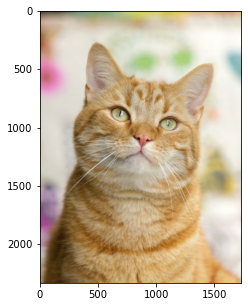

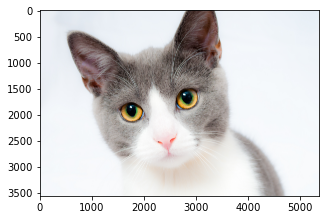

In [5]:
#　もとの画像
cat_img = []
cat_img.append(CatImage('cat01.png'))
cat_img.append(CatImage('cat02.png'))
cat_img.append(CatImage('cat03.png'))

for c in cat_img:
    c.show()

In [6]:
cats1 = []

# 1枚め
cat = cat_img[0].nomalize((2600, 1500), 0.1)
cats1.append(cat)
cats1.append(cat.change_color())
cats1.append(cat_img[0].change_ratio().nomalize((3100, 1500), 0.09))
cats1.append(cat.rotate_left())
cats1.append(cat.rotate_right())
cats1.append(cat.flip())


# 2枚め
cat = cat_img[1].nomalize((850, 1000), 0.2)
cats1.append(cat)
cats1.append(cat.change_color())
cats1.append(cat_img[1].change_ratio().nomalize((1000, 1000), 0.18))
cats1.append(cat.rotate_left())
cats1.append(cat.rotate_right())
cats1.append(cat.flip())


# 3枚目
cat = cat_img[2].nomalize((2400, 1900), 0.09)
cats1.append(cat)
cats1.append(cat.change_color())
cats1.append(cat_img[2].change_ratio().nomalize((2800, 1900), 0.08))
cats1.append(cat.rotate_left())
cats1.append(cat.rotate_right())
cats1.append(cat.flip())

# できあがった画像を保存

for i, c in enumerate(cats1):
    c.save('cat_reformed_' + str(i) + '.png')
